In [0]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

In [0]:
hoda = scipy.io.loadmat('/Data_hoda_full.mat')

In [0]:
print(type(hoda))

<class 'dict'>


In [0]:
print(hoda.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])


In [0]:
print(type(hoda['Data']))

<class 'numpy.ndarray'>


In [0]:
print(hoda['Data'].shape)

(60000, 1)


In [0]:
print(type(hoda['labels']))

<class 'numpy.ndarray'>


In [0]:
print(hoda['labels'].shape)

(60000, 1)


In [0]:
data= hoda['Data'].reshape(-1)

In [0]:
print(data.shape)

(60000,)


In [0]:
labels = hoda['labels'].reshape(-1)

In [0]:
print(labels.shape)

(60000,)


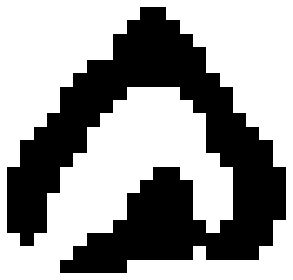

In [0]:
pic1_data = data[1]
pic1_label = labels[1]
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(pic1_data,cmap= matplotlib.cm.Greys)
plt.show()

In [0]:
print(pic1_label)

5


In [0]:
for i in range(1,6):
    print(data[i].shape)

(20, 21)
(10, 15)
(36, 17)
(36, 28)
(12, 14)


In [0]:
data_resized = np.array([cv2.resize(img, dsize=(5, 5)) for img in data])

In [0]:
for i in range(1,6):
      print(data_resized[i].shape)

(5, 5)
(5, 5)
(5, 5)
(5, 5)
(5, 5)


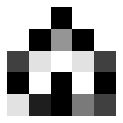

In [0]:
plt.figure(figsize = (2,2))
plt.axis('off')
plt.imshow(data_resized[1],cmap= matplotlib.cm.Greys)
plt.show()

In [0]:
data_norm = data_resized/255
data_norm[1]

array([[0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.50196078, 1.        , 0.        ],
       [0.8       , 0.2       , 0.        , 0.2       , 0.8       ],
       [1.        , 0.        , 1.        , 0.        , 1.        ],
       [0.2       , 0.89803922, 1.        , 0.6       , 0.8       ]])

In [0]:
data_norm.shape

(60000, 5, 5)

In [0]:
data_norm = data_norm.reshape(60000,25)
data_norm.shape

(60000, 25)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_norm,labels)

In [0]:
print("size of training dataset is: " + str(X_train.shape))
print("size of test dataset is: " + str(X_test.shape))

size of training dataset is: (45000, 25)
size of test dataset is: (15000, 25)


In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
n_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, n_classes)
y_test_cat = keras.utils.to_categorical(y_train,n_classes)
y_train[1]

4

In [0]:
model = Sequential()

In [0]:
model = Sequential()
model.add(Dense(50,activation = 'relu', input_shape = (25,)))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train_cat, batch_size = 512, epochs=100,verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





45000/45000 [==============================] - 4s 88us/step - loss: 1.3552 - acc: 0.6157
Epoch 2/100
45000/45000 [==============================] - 1s 11us/step - loss: 0.3801 - acc: 0.8796
Epoch 3/100
45000/45000 [==============================] - 0s 11us/step - loss: 0.2694 - acc: 0.9127
Epoch 4/100
45000/45000 [==============================] - 0s 11us/step - loss: 0.2344 - acc: 0.9240
Epoch 5/100
45000/45000 [==============================] - 0s 11us/step - loss: 0.2142 - acc: 0.9312
Epoch 6/100
45000/45000 [==============================] - 0s 11us/step - loss: 0.2003 - acc: 0.9342
Epoch 7/100
45000/45000 [==============================] - 1s 11us/step - loss: 0.1886 - acc: 0.9392
Epoch 8/100
45000/45000 [==============================] - 1s 12us/step - loss: 0.1804 - acc: 0.9414
Epoch 9/100
45000/45000 [==============================] - 0s 11us/step - loss: 0.1735 - a

In [0]:
model.evaluate(X_test,y_test_cat,batch_size = None,verbose = 1,sample_weight=None,steps=None,callbacks=None,max_queue_size=10,workers=1,use_multiprocessing=False)

ValueError: ignored

In [1]:
preds = model.predict_classes(X_test)
preds

NameError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')